# Look at the optimzation progress for DYCORS
David Eriksson <dme65@cornell.edu>

In [5]:
from pySOT.experimental_design import SymmetricLatinHypercube
from pySOT.strategy import DYCORSStrategy
from pySOT.surrogate import RBFInterpolant, CubicKernel, LinearTail
from pySOT.optimization_problems import Func3C,Func3R,Func2C,Func2R,Ackley15C,Ackley15I
from pySOT.utils import progress_plot
from poap_modified.controller import ThreadController, SerialController, BasicWorkerThread
import numpy as np

import matplotlib.pylab as plt
plt.rc('xtick', labelsize=16) 
plt.rc('ytick', labelsize=16)

In [6]:
num_threads = 4
max_evals = 400
num_runs = 100

func = Func3R(dim=5)
func.set_detail(False) ##############是否需要输出详细的流程信息
#func.set_ranks([[0, 1, 2], [0, 1, 2, 3], [4, 0, 2, 1, 3]])
print(func.info)

rbf = RBFInterpolant(
    dim=func.dim, lb=func.lb, ub=func.ub, kernel=CubicKernel(), tail=LinearTail(func.dim))
slhd = SymmetricLatinHypercube(dim=func.dim, num_pts=2*(func.dim+1))

5-dimensional Func3C function 
Global optimum: 未知


## Run in serial

In [10]:
results_serial = np.zeros((max_evals, num_runs))
for i in range(num_runs):
    controller = SerialController(objective=func.eval)
    controller.strategy = DYCORSStrategy(
        max_evals=max_evals, opt_prob=func, asynchronous=False, 
        exp_design=slhd, surrogate=rbf, num_cand=100*func.dim,
        batch_size=1)
    result = controller.run()
    results_serial[:, i] = np.array(
        [o.value for o in controller.fevals if o.value is not None])

In [ ]:
record = controller.best_point()
print("record.params:",end=' ')
print(record.params[0])
print("best_location:",end=' ')
print(controller.best_loc())
print("best_value:",end= ' ')
print(record.value)

In [ ]:
fcomplete = [f for f in controller.fevals if f.is_completed]
for f in fcomplete:
    print(f.params[0])

In [11]:
np.savetxt('rankchange.txt', results_serial, delimiter=' ', fmt='%.6f')

In [7]:
data_01234 = np.loadtxt('rank01234.txt', delimiter=' ')
data_13042 = np.loadtxt('rank13042.txt', delimiter=' ')
data_21340 = np.loadtxt('rank21340.txt', delimiter=' ')
data_34102 = np.loadtxt('rank34102.txt', delimiter=' ')
data_40213 = np.loadtxt('rank40213.txt', delimiter=' ')
data_change = np.loadtxt('rankchange.txt', delimiter=' ')

In [8]:
file_path = 'D:/MixedOpt/Func3C.txt'
with open(file_path, 'r') as file:
    data = [float(line.strip()) for line in file.readlines()]
arr = np.array(data)
results_casmopolitan = arr.reshape(10, 400).T

## Compare the results

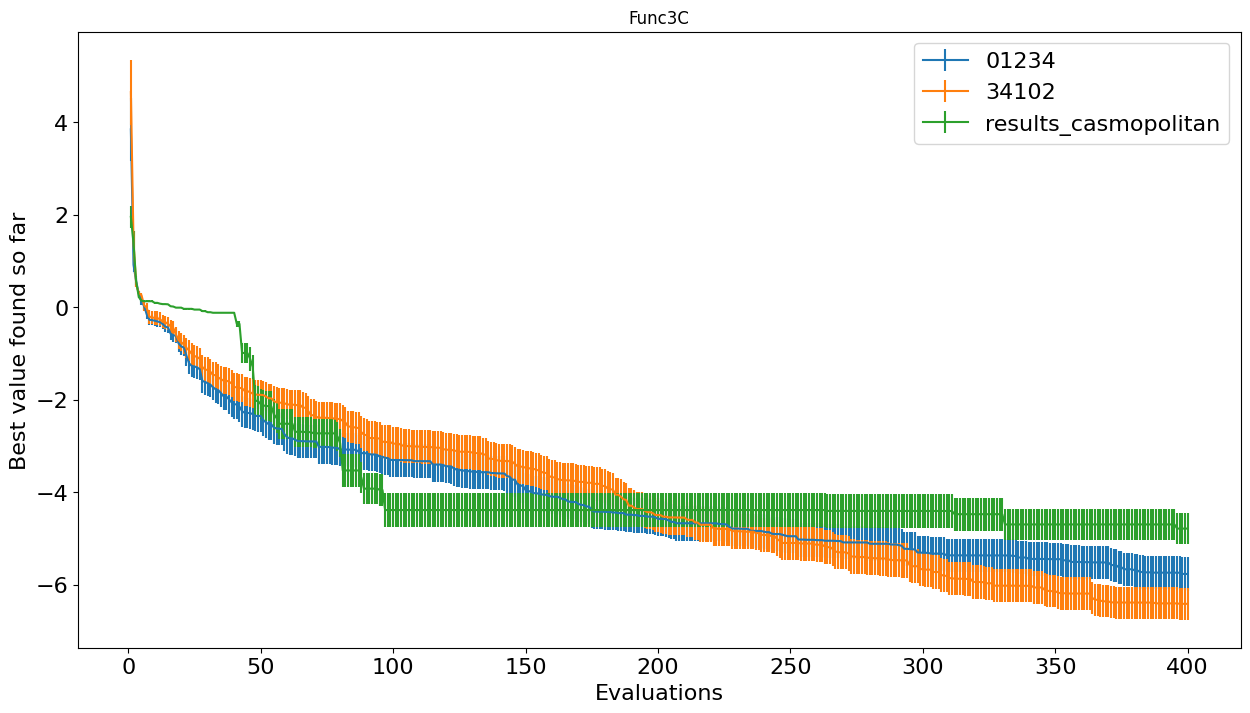

In [9]:
plt.figure(figsize=(15, 8))
fvals1 = np.minimum.accumulate(data_01234)
plt.errorbar(np.arange(max_evals)+1, y=np.mean(fvals1, axis=1), 
                yerr=np.std(fvals1, axis=1)/np.sqrt(float(num_runs)))
# fvals2 = np.minimum.accumulate(data_13042)
# plt.errorbar(np.arange(max_evals)+1, y=np.mean(fvals2, axis=1), 
#                 yerr=np.std(fvals2, axis=1)/np.sqrt(float(num_runs)))
# fvals3 = np.minimum.accumulate(data_21340)
# plt.errorbar(np.arange(max_evals)+1, y=np.mean(fvals3, axis=1), 
#                 yerr=np.std(fvals3, axis=1)/np.sqrt(float(num_runs)))
fvals4 = np.minimum.accumulate(data_34102)
plt.errorbar(np.arange(max_evals)+1, y=np.mean(fvals4, axis=1), 
                yerr=np.std(fvals4, axis=1)/np.sqrt(float(num_runs)))
# fvals5 = np.minimum.accumulate(data_40213)
# plt.errorbar(np.arange(max_evals)+1, y=np.mean(fvals5, axis=1), 
#                 yerr=np.std(fvals5, axis=1)/np.sqrt(float(num_runs)))
# fvals6 = np.minimum.accumulate(data_change)
# plt.errorbar(np.arange(max_evals)+1, y=np.mean(fvals6, axis=1), 
#                 yerr=np.std(fvals6, axis=1)/np.sqrt(float(num_runs)))
fvals7 = np.minimum.accumulate(results_casmopolitan)
plt.errorbar(np.arange(max_evals)+1, y=np.mean(fvals7, axis=1), 
                yerr=np.std(fvals7, axis=1)/np.sqrt(float(num_runs)))

plt.ylabel("Best value found so far", fontsize=16)
plt.xlabel("Evaluations", fontsize=16)
# plt.ylim([-0.23,0.2])
# plt.legend(("01234","13042","21340","34102","40213","change"), fontsize=16)
plt.legend(("01234","34102","results_casmopolitan"), fontsize=16)
plt.title("Func3C")
plt.show()

In [ ]:
plt.figure(figsize=(15, 8))
fvals1 = np.minimum.accumulate(results_serial)
plt.errorbar(np.arange(max_evals)+1, y=np.mean(fvals1, axis=1), 
                yerr=np.std(fvals1, axis=1)/np.sqrt(float(num_runs)))
#     plt.plot(np.arange(0, fvals.shape[0]), np.minimum.accumulate(fvals), lw=2)
fvals4 = np.minimum.accumulate(results_serial2)
plt.errorbar(np.arange(max_evals)+1, y=np.mean(fvals4, axis=1), 
                yerr=np.std(fvals4, axis=1)/np.sqrt(float(num_runs)))
plt.ylabel("Best value found so far", fontsize=16)
plt.xlabel("Evaluations", fontsize=16)

fvals2 = np.minimum.accumulate(results_casmopolitan)
plt.errorbar(np.arange(200)+1, y=np.mean(fvals2, axis=1), 
                yerr=np.std(fvals2, axis=1)/np.sqrt(float(10)))

fvals3 = np.minimum.accumulate(results_random)
plt.errorbar(np.arange(200)+1, y=np.mean(fvals3, axis=1), 
                yerr=np.std(fvals3, axis=1)/np.sqrt(float(10)))
plt.ylim([-0.23,0.2])
plt.legend(("Serial","Serial_int","casmopolitan","random"), fontsize=16)
plt.title("Func2C")
plt.show()

## Run asynchronously

In [ ]:
results_async = np.zeros((max_evals, num_runs))
for i in range(num_runs):
    controller = ThreadController()
    controller.strategy = DYCORSStrategy(
        max_evals=max_evals, opt_prob=ackley, asynchronous=True, 
        exp_design=slhd, surrogate=rbf, num_cand=100*ackley.dim)

    for _ in range(num_threads):
        worker = BasicWorkerThread(controller, ackley.eval)
        controller.launch_worker(worker)

    result = controller.run()
    results_async[:, i] = np.array(
        [o.value for o in controller.fevals if o.value is not None])

## Run synchronously

In [ ]:
results_sync = np.zeros((max_evals, num_runs))
for i in range(num_runs):
    controller = ThreadController()
    controller.strategy = DYCORSStrategy(
        max_evals=max_evals, opt_prob=ackley, asynchronous=False, 
        exp_design=slhd, surrogate=rbf, num_cand=100*ackley.dim,
        batch_size=num_threads)

    for _ in range(num_threads):
        worker = BasicWorkerThread(controller, ackley.eval)
        controller.launch_worker(worker)

    result = controller.run()
    results_sync[:, i] = np.array(
        [o.value for o in controller.fevals if o.value is not None])

In [ ]:
ranks = [[0,1,2],[0,1,2,3,4]]
ranks[1] = np.random.permutation(ranks[1])
ranks